In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import ssl

# Ignorowanie błędów certyfikatu SSL
ssl._create_default_https_context = ssl._create_unverified_context


In [7]:
# Wczytaj dane MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Konwersja DataFrame do numpy array, jeśli to konieczne
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
y = y.to_numpy()


In [8]:
# Podziel dane na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skaluj dane
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Utwórz i trenuj model k-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

In [10]:
# Przewiduj
y_pred = knn.predict(X_test_scaled)

# Oblicz dokładność
accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność modelu k-NN: {accuracy:.2f}')


Dokładność modelu k-NN: 0.95


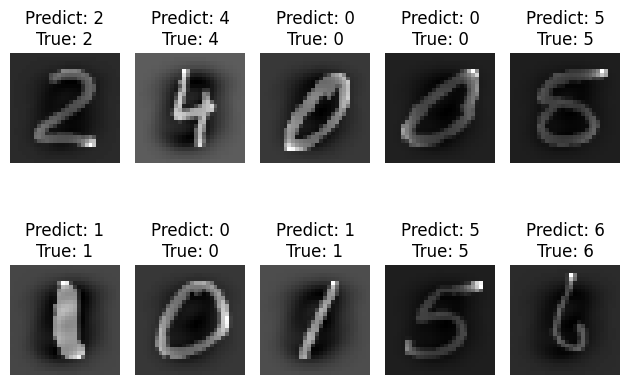

In [13]:
# Wyświetl kilka przykładowych obrazów z ich przewidywanymi i rzeczywistymi etykietami
num_samples = 10  # liczba obrazów do wyświetlenia
indices = np.random.choice(range(len(X_test_scaled)), num_samples, replace=False)

for i, idx in enumerate(indices):
    image = X_test_scaled[idx].reshape(28, 28)  # Przekształć wektor z powrotem na obraz 28x28
    predicted_label = y_pred[idx]
    true_label = y_test[idx]

    plt.subplot(2, num_samples // 2, i + 1)
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.title(f'Predict: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()
